In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob
plt.rcParams["figure.figsize"] = (15,10)

# Angle

In [9]:
fnames_angle = glob('./analysis_data/angle/out*_angle')
fnames_z = glob('./analysis_data/z/out*_z')
arrays_angle = [np.loadtxt(f) for f in fnames_angle]
arrays_z = [np.loadtxt(f) for f in fnames_z]
final_array_angle = np.concatenate(arrays_angle)
final_array_z = np.concatenate(arrays_z)

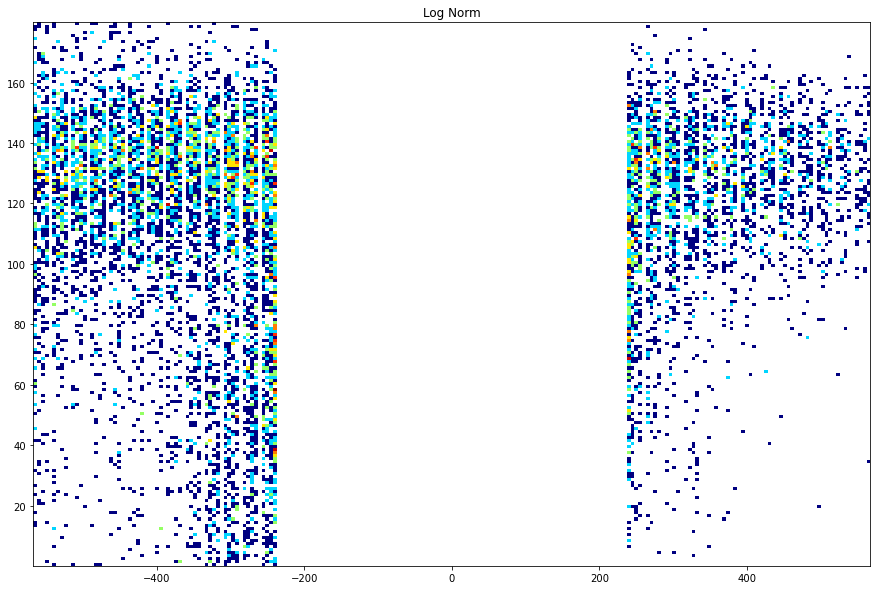

In [10]:
angle_deg = final_array_angle/(2*np.pi)*360
plt.hist2d(final_array_z, angle_deg, bins=(220, 180), cmap=plt.cm.jet, norm = mpl.colors.LogNorm())#, interpolation="nearest")
plt.title("Log Norm")
plt.savefig("TileHitAngleColorMapLogNorm", dpi=600)
plt.show()

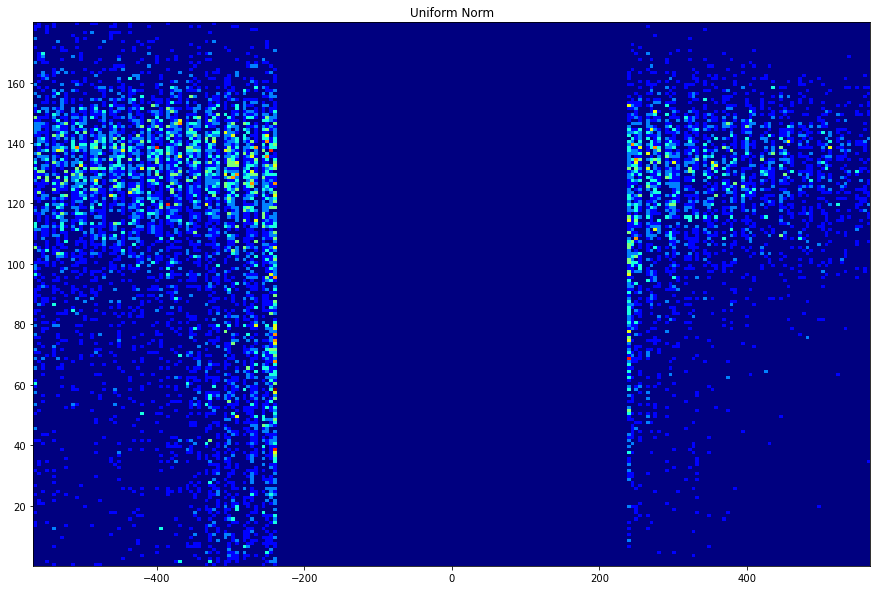

In [11]:
plt.hist2d(final_array_z, angle_deg, bins=(220, 180), cmap=plt.cm.jet)#, interpolation="nearest")
plt.title("Uniform Norm")
plt.savefig("TileHitAngleColorMap", dpi=600)
plt.show()

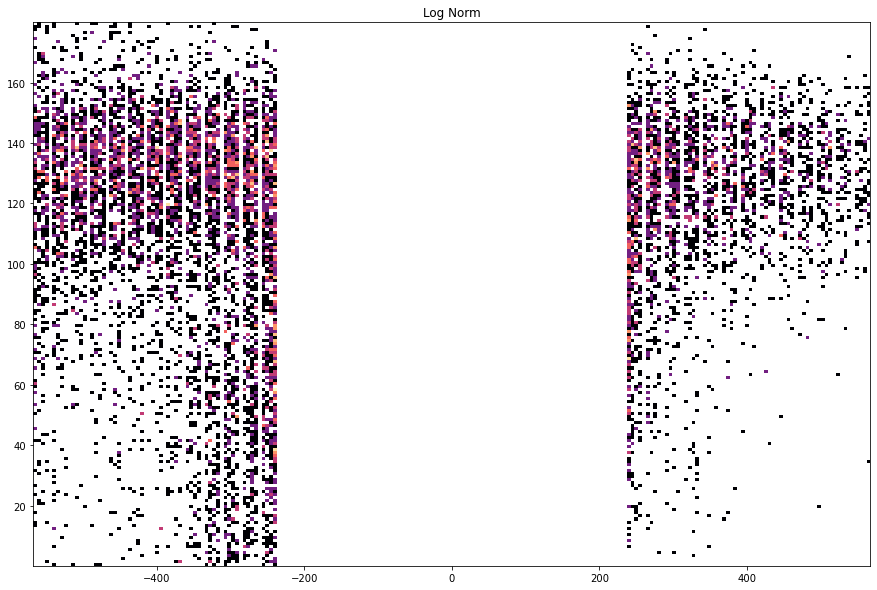

In [12]:
plt.hist2d(final_array_z, angle_deg, bins=(220, 180), cmap="magma", norm = mpl.colors.LogNorm())#, interpolation="nearest")
plt.title("Log Norm")
plt.show()

# Rate